In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ANZ synthesised transaction dataset.xlsx to ANZ synthesised transaction dataset.xlsx


In [ ]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
df.shape

(12043, 23)

In [ ]:
df.long_lat.value_counts()

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

Most of transactions are done at lat & long - 153.41 -27.95 
and second highest at - 151.23 -33.94

In [ ]:
print(df['amount'][df['long_lat']=='153.41 -27.95'].sum())
print(df['amount'][df['long_lat']=='151.23 -33.94'].sum())

26211.59
23696.449999999997


In [ ]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Most of transactions are linked to SALES-POS and POS (3934,3783)

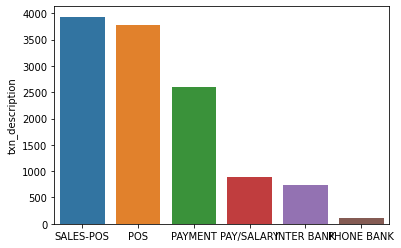

In [ ]:
sns.barplot(df.txn_description.value_counts().index,df.txn_description.value_counts())

In [ ]:
df['amount'][df['txn_description']=='SALES-POS'].sum()
li=[]
li.append(df['amount'][df['txn_description']=='SALES-POS'].sum())

In [ ]:
li.append(df['amount'][df['txn_description']=='POS'].sum())

In [ ]:
li.append(df['amount'][df['txn_description']=='PAYMENT'].sum())

In [ ]:
li.append(df['amount'][df['txn_description']=='PAY/SALARY'].sum())

In [ ]:
li.append(df['amount'][df['txn_description']=='INTER BANK'].sum())
li.append(df['amount'][df['txn_description']=='PHONE BANK'].sum())

Though most of transactions are for POS, the more money transacted is through PAY/SALARY (1600000)(1.6 Million AUD)

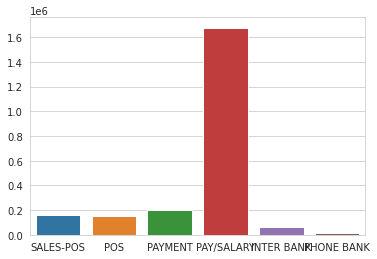

In [ ]:
sns.set_style('whitegrid')
sns.barplot(df.txn_description.value_counts().index,li)

In [ ]:
df['amount'][df['txn_description']=='PAY/SALARY'].mean()

1898.7280294450716

The average salary of every customer who have account in our bank. (1900 AUD)

In [ ]:
df.date.value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [ ]:
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month

In [ ]:
df1=df[['day','month','amount']]

In [ ]:
df2=df1.groupby(['day']).sum()

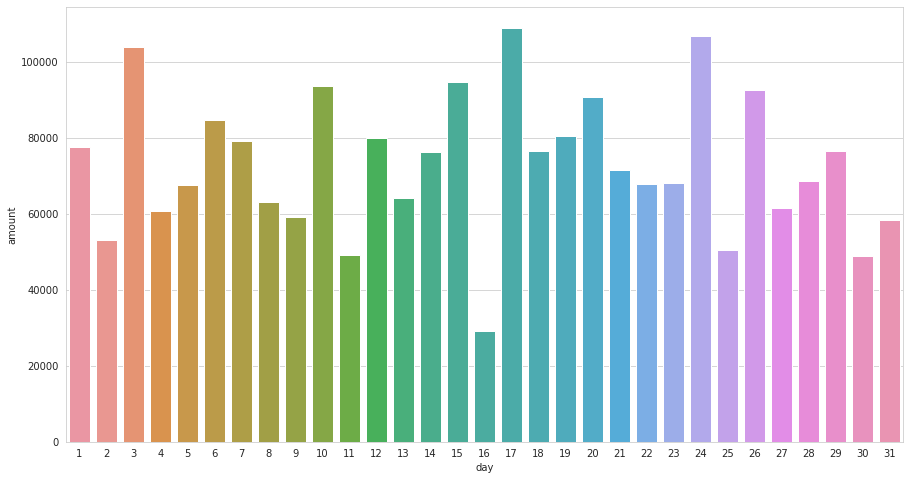

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df2.index,df2.amount)

There are 3 instances where 100,000 AUD amount was transacted which were on 3rd ,17th and 24th.

In [ ]:
df3=df1.groupby(['month']).sum()

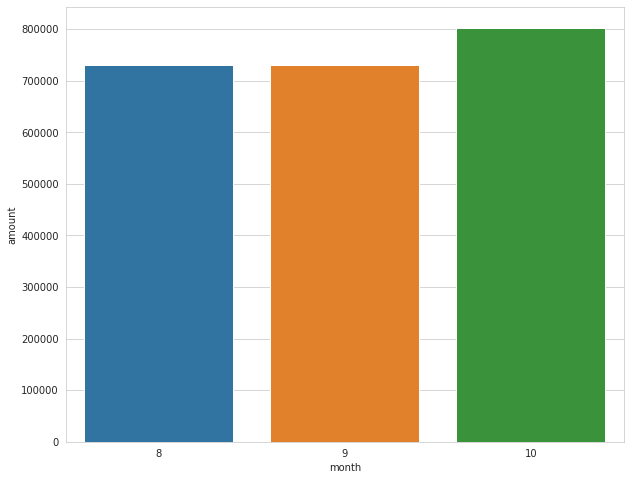

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(df3.index,df3.amount)

Highest transaction was done in 10th month for 800,000 AUD

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
df['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [ ]:
df4=df[['gender','amount']]

In [ ]:
df4.groupby(['gender']).mean()

,amount
gender,
F,168.517303
M,205.721809


In [ ]:
df4.groupby(['gender']).sum()

,amount
gender,
F,970322.63
M,1292961.57


Men have high amount transaction rate than women and so have the highest average.
average(205 per trans AUD).
sum(1292961 AUD)

In [ ]:
df5=df[['gender','txn_description','amount']]
df6=df[['gender','day','amount']]
df7=df[['gender','month','amount']]

In [ ]:
df5.groupby(['gender','txn_description']).sum()

amount
gender txn_description           
F      INTER BANK        26449.00
       PAY/SALARY       703656.23
       PAYMENT           85033.00
       PHONE BANK         4237.00
       POS               74126.26
       SALES-POS         76821.14
M      INTER BANK        37882.00
       PAY/SALARY       972920.62
       PAYMENT          116761.00
       PHONE BANK         6479.00
       POS               78734.98
       SALES-POS         80183.97

In all categories Male are showing the domination in transaction amount

In [ ]:
df['account'].value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [ ]:
df['first_name'][df['account']=='ACC-1598451071'].iloc[0]

'Diana'

Highest transaction in past 3 months - 'Diana'

In [ ]:
df.extraction.value_counts()

2018-09-03T11:00:00.000+0000    10
2018-09-04T17:00:00.000+0000     9
2018-09-17T11:00:00.000+0000     9
2018-08-07T17:00:00.000+0000     9
2018-10-23T17:00:00.000+0000     9
                                ..
2018-08-12T01:23:13.000+0000     1
2018-10-02T09:40:16.000+0000     1
2018-08-09T08:36:12.000+0000     1
2018-10-28T02:54:47.000+0000     1
2018-09-09T20:57:23.000+0000     1
Name: extraction, Length: 9442, dtype: int64

Highest extraction was carried out on 03-09-2018

In [ ]:
df['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [ ]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [ ]:
df7=df[['movement','gender','amount']]
df7.groupby(['movement','gender']).sum()

amount
movement gender           
credit   F       703656.23
         M       972920.62
debit    F       266666.40
         M       320040.95

The most amount was spent using credit card and male have spent the highest(on credit - 972920) (703656 otherwise)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
df8=df[['movement','day','month','amount']]

In [ ]:
df8.groupby(['movement','month']).sum()

day     amount
movement month                  
credit   8       4877  559814.33
         9       4217  516595.61
         10      4898  600166.91
debit    8      58785  170121.19
         9      58300  213954.60
         10     59960  202631.56

In [ ]:
df9=df[['age','gender','amount']]

In [ ]:
df['age'].min()
#df['age'].max()

18

In [ ]:
age_bins=pd.cut(df['age'],bins=[15,20,30,40,50,60,70,80],labels=['(15-20)','(20-30)','(30-40)','(40-50)','(50-60)','(60-70)','(70-80)'])

In [ ]:
df9['age_bins']=age_bins

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df9.drop('age',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df9.groupby(['gender','age_bins']).sum()

amount
gender age_bins           
F      (15-20)   179022.73
       (20-30)   337548.44
       (30-40)   301440.00
       (40-50)   125455.07
       (50-60)    16268.97
       (60-70)    10587.42
       (70-80)         NaN
M      (15-20)   163096.06
       (20-30)   501837.23
       (30-40)   396358.69
       (40-50)   169900.95
       (50-60)    32243.17
       (60-70)    18680.22
       (70-80)    10845.25

Age 15-20 Females are spending the most compared to males in the same age group.
In all other age groups males have dominated the expenditure.

Age (20-30) Females are most spent age group in Females.-(337,548)
and is the same with males.-(501,837)

In [ ]:
df['amount'].mean()

187.93358797641767

Average transaction amount is 188 AUD

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
12043/3

4014.3333333333335

There are 4014 transactions on average per month

In [ ]:
df22=df2.drop('month',inplace=True,axis=1)

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2['day_bins']=pd.cut(df2['day'],bins=[0,10,20,30,31],labels=['(0-10)','(10-20)','(20-30)','(30-31)'])
df2.head(1)

,day,amount,day_bins
0,1,77551.86,(0-10)


In [ ]:
df22=df2.copy()

In [ ]:
df22.drop('day',inplace=True,axis=1)

In [ ]:
kk=df22.groupby(['day_bins']).sum()

Text(0.5, 1.0, 'transaction amount per ten days in a month')

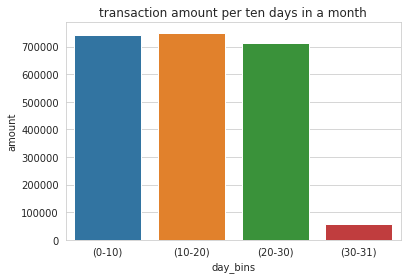

In [ ]:
sns.barplot(kk.index,kk['amount'])
plt.title('transaction amount per ten days in a month')

More amount is transacted in mid 10 days of the month

In [ ]:
trans=df[['transaction_id','day','month']]

In [ ]:
trans1=pd.pivot_table(trans,index='day',values='transaction_id',aggfunc=[lambda x:x.count()])

In [ ]:
trans1.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='day')

In [ ]:
trans1.unstack(level=0)

                          day
<lambda>  transaction_id  1      377
                          2      405
                          3      426
                          4      402
                          5      417
                          6      381
                          7      371
                          8      365
                          9      382
                          10     400
                          11     394
                          12     412
                          13     395
                          14     416
                          15     383
                          16     220
                          17     446
                          18     412
                          19     424
                          20     369
                          21     411
                          22     399
                          23     362
                          24     405
                          25     388
                          26     422
        

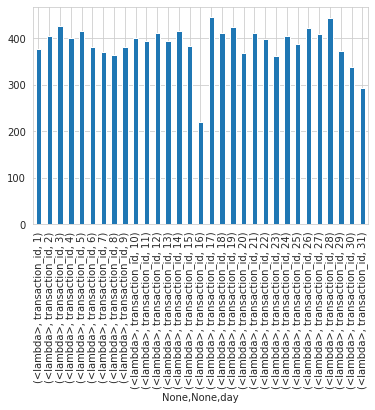

In [ ]:
trans1.unstack(level=1).plot(kind='bar')

on 16th and 31 less significant transactions took place (pay checks)

In [ ]:
trans.head()

,transaction_id,day,month
0,a623070bfead4541a6b0fff8a09e706c,1,8
1,13270a2a902145da9db4c951e04b51b9,1,8
2,feb79e7ecd7048a5a36ec889d1a94270,1,8
3,2698170da3704fd981b15e64a006079e,1,8
4,329adf79878c4cf0aeb4188b4691c266,1,8


In [ ]:
trans['day_bins']=pd.cut(trans['day'],bins=[0,10,20,30,31],labels=['(0-10)','(10-20)','(20-30)','(30-31)'])
trans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,transaction_id,day,month,day_bins
0,a623070bfead4541a6b0fff8a09e706c,1,8,(0-10)
1,13270a2a902145da9db4c951e04b51b9,1,8,(0-10)
2,feb79e7ecd7048a5a36ec889d1a94270,1,8,(0-10)
3,2698170da3704fd981b15e64a006079e,1,8,(0-10)
4,329adf79878c4cf0aeb4188b4691c266,1,8,(0-10)


In [ ]:
trans2=trans[['day_bins','transaction_id']]

In [ ]:
bb=trans2.groupby(['day_bins']).count()

Text(0.5, 1.0, 'No of transactions per 10 days in month')

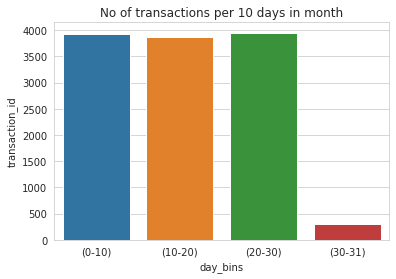

In [ ]:
sns.barplot(bb.index,bb['transaction_id'])
plt.title('No of transactions per 10 days in month')

The most transactions occured in last 10 days(20-31) of the month

In [ ]:
bb

,transaction_id
day_bins,
(0-10),3926
(10-20),3871
(20-30),3952
(30-31),294


In [ ]:
trans3=trans[['month','transaction_id']]

In [ ]:
trans3.groupby(['month']).count()

,transaction_id
month,
8,3943
9,4013
10,4087


The transaction have been increasing from month 8 to 10.
The highest recorded transactions are on month 10 (october)

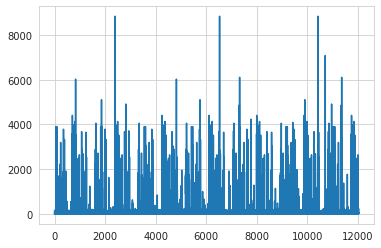

In [ ]:
df['amount'].plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
df.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

NSW state has made highest transactions with VIC.
The Least number transactions are with TAS.
Though we donot have many datapoints.(lots of missing points)

In [ ]:
patt=df[['month','day','amount']]

In [ ]:
patt8=patt['month']==8]

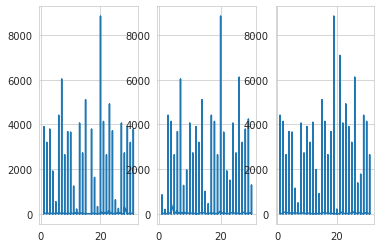

In [ ]:
plt.figure()
plt.subplot(1,3,1)

plt.plot(patt8['day'],patt8['amount'])

patt9=patt[patt['month']==9]
plt.subplot(132)
plt.plot(patt9['day'],patt9['amount'])

patt10=patt[patt['month']==10]
plt.subplot(133)
plt.plot(patt10['day'],patt10['amount'])
fi

****** 19th -20th of every month the amount transacted is almost the same about 9000 AUD

In [ ]:
 patt12=df[['merchant_state','month','day','amount']]

In [ ]:
patt1=patt12[patt12['merchant_state']=='NSW']

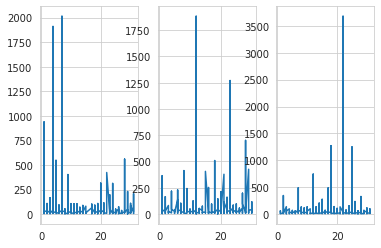

In [ ]:
patt1=patt12[patt12['merchant_state']=='VIC']
plt.figure()
plt.subplot(1,3,1)
patt18=patt1[patt1['month']==8]
plt.plot(patt18['day'],patt18['amount'])

patt19=patt1[patt1['month']==9]
plt.subplot(132)
plt.plot(patt19['day'],patt19['amount'])

patt110=patt1[patt1['month']==10]
plt.subplot(133)
plt.plot(patt110['day'],patt110['amount'])


In [ ]:
df.merchant_suburb.value_counts()

Melbourne           255
Sydney              233
Southport            82
Brisbane City        79
Chatswood            55
                   ... 
Glenroy               1
Stanhope Gardens      1
Bracknell             1
Weston Creek          1
Bellingen             1
Name: merchant_suburb, Length: 1609, dtype: int64

More transactions have been donw in Melbourne and Sydney